# Using Pandas' Pivot Tables and Graphs for Data Analysis

In [1]:
import numpy as np
import pandas as pd

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
births = pd.read_csv('https://raw.githubusercontent.com/jakevdp/data-CDCbirths/master/births.csv')

In [3]:
births.shape

(15547, 5)

In [4]:
births.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15547 entries, 0 to 15546
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    15547 non-null  int64  
 1   month   15547 non-null  int64  
 2   day     15067 non-null  float64
 3   gender  15547 non-null  object 
 4   births  15547 non-null  int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 607.4+ KB


In [5]:
births.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [6]:
births['decade'] = 10 * (births.year // 10)

In [7]:
# Obtaining the sum of births during each decade, grouped by gender

births_decade = births.pivot_table('births', index='decade', columns='gender', aggfunc='sum')
births_decade

gender,F,M
decade,,
1960,1753634,1846572
1970,16263075,17121550
1980,18310351,19243452
1990,19479454,20420553
2000,18229309,19106428


The pivot table shows that more males were born in each decade than females. 

Let us view the annual trend in births graphically.

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter

plt.style.use('fivethirtyeight')

In [9]:
births_annual = births.pivot_table('births', index='year', columns='gender', aggfunc='sum')

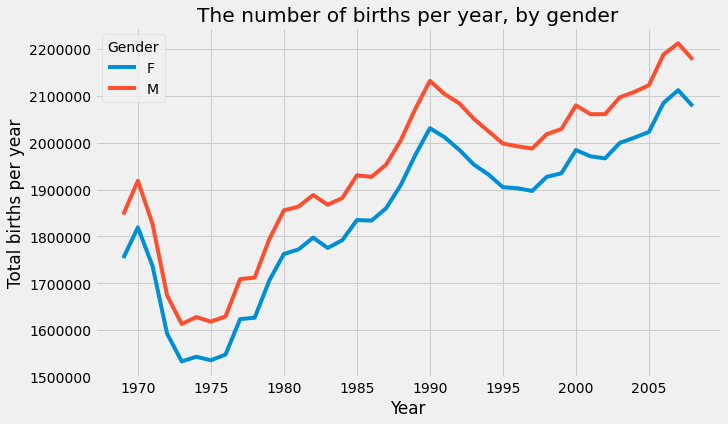

In [10]:
fig_size1 = (10, 6)
fig, ax = plt.subplots(figsize=fig_size1)

ax = births_annual.plot(ax=ax)

leg=plt.legend()
leg.set_title('Gender')

ax.get_yaxis().get_major_formatter().set_scientific(False)
ax.set_title('The number of births per year, by gender')
ax.set_xlabel('Year')
ax.set_ylabel('Total births per year');

The graph indicates that the number of male births has exceeded the number of female births all through the years that are listed in our data&nbsp;set.

In [11]:
births.head()

,year,month,day,gender,births,decade
0,1969,1,1.0,F,4046,1960
1,1969,1,1.0,M,4440,1960
2,1969,1,2.0,F,4454,1960
3,1969,1,2.0,M,4548,1960
4,1969,1,3.0,F,4548,1960


Next, we will retrieve additional information, such as the number of births by day of the week. But, before we do so, we will look for and remove outliers. We will focus on the day column, which has a higher probability of containing incorrect data because of typos. For example, the fields in the day column grouped by June—the 6$^{th}$ month—contain incorrect values, such as 31. Let us remove rows that contain these&nbsp;values.

In [12]:
# Retrieving unique values from the month column

births.month.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [13]:
# Exploring some of the rows, grouped by the month of June

births[births.month==6].iloc[55:65, 0:3]

,year,month,day
375,1969,6,28.0
376,1969,6,29.0
377,1969,6,29.0
378,1969,6,30.0
379,1969,6,30.0
380,1969,6,31.0
381,1969,6,31.0
382,1969,6,99.0
383,1969,6,99.0
1088,1970,6,1.0


In [14]:
births[births.month==6].day.unique()

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 99., nan])

In [15]:
# Using sigma clipping to remove outliers

quartiles = np.percentile(births.births, [25, 50, 75])

mu = quartiles[1]
sig = 0.74 * (quartiles[2] - quartiles[0])

births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')

Now, the day values for June don't contain outliers.

In [16]:
births[births.month==6].day.unique()

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30.])

In [17]:
births.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14610 entries, 0 to 15066
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    14610 non-null  int64  
 1   month   14610 non-null  int64  
 2   day     14610 non-null  float64
 3   gender  14610 non-null  object 
 4   births  14610 non-null  int64  
 5   decade  14610 non-null  int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 799.0+ KB


Let us also set the data type of the day column to integer.

In [18]:
births.day = births.day.astype('int')

Next, we will add a day-of-week column to the data set. We will create a Date index based on the year, month, and day values and then extract the day of the week from the index to create the new column.

In [19]:
births.index = pd.to_datetime(10000 * births.year + 100 * births.month + births.day, format='%Y%m%d')

In [20]:
births.head(3)

,year,month,day,gender,births,decade
1969-01-01,1969,1,1,F,4046,1960
1969-01-01,1969,1,1,M,4440,1960
1969-01-02,1969,1,2,F,4454,1960


In [21]:
births['day_of_week'] = births.index.dayofweek

In [22]:
births.head(3)

,year,month,day,gender,births,decade,day_of_week
1969-01-01,1969,1,1,F,4046,1960,2
1969-01-01,1969,1,1,M,4440,1960,2
1969-01-02,1969,1,2,F,4454,1960,3


Now, we will plot the number of births by day of week, across decades.

In [23]:
births_day_week = births.pivot_table('births', index='day_of_week', 
                                     columns='decade', aggfunc='mean')

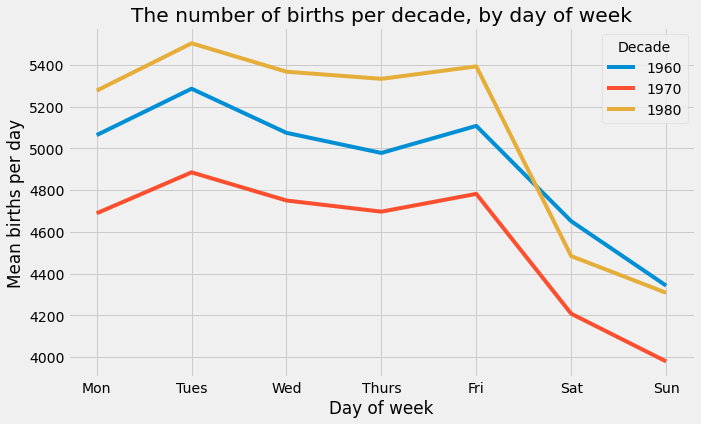

In [24]:
fig, ax = plt.subplots(figsize=fig_size1)

ax = births_day_week.plot(ax=ax)

leg=plt.legend()
leg.set_title('Decade')

ax.set_title('The number of births per decade, by day of week')
ax.set_xlabel('Day of week')
ax.set_ylabel('Mean births per day')

ax.set_xticks(range(7))
ax.set_xticklabels(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']);

According to the graph, fewer births take place on weekends than on weekdays

Next, let us plot the average number of births by day of the year. We will begin by grouping the available data by day, within each month. 

In [25]:
births_by_day = births.pivot_table('births', [births.index.month, births.index.day])

In [26]:
births_by_day.head()

births
1 1  4009.225
  2  4247.400
  3  4500.900
  4  4571.350
  5  4603.625

And now we will draw the plot.

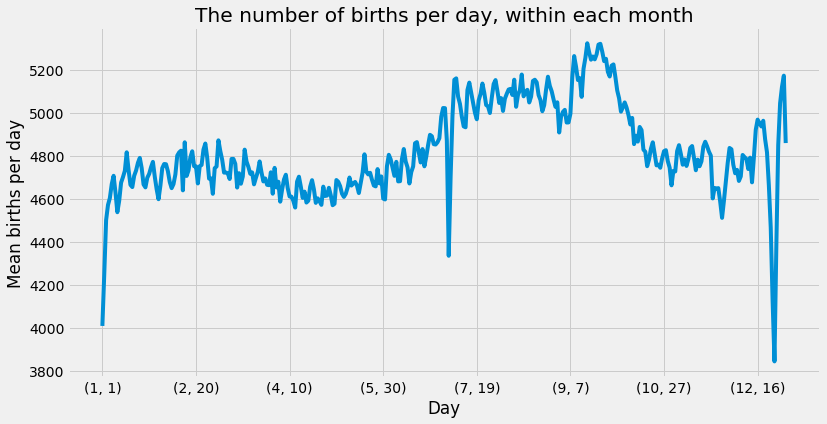

In [27]:
fig, ax = plt.subplots(figsize=(12,6))

ax = births_by_day.plot(ax=ax)

plt.legend().remove()

ax.set_title('The number of births per day, within each month')
ax.set_xlabel('Day')
ax.set_ylabel('Mean births per day');

To be able to display month names instead of tuples along the x axis, we will change the index of the births_by_day data frame. We will replace the index with a dummy leap-year variable so that all possible days in a year are accounted for.

In [28]:
from datetime import datetime

births_by_day.index = [datetime(2012, month, day) for (month, day) in births_by_day.index]

In [29]:
births_by_day.head()

,births
2012-01-01,4009.225
2012-01-02,4247.400
2012-01-03,4500.900
2012-01-04,4571.350
2012-01-05,4603.625


We will now redraw the graph, annotating specific days.

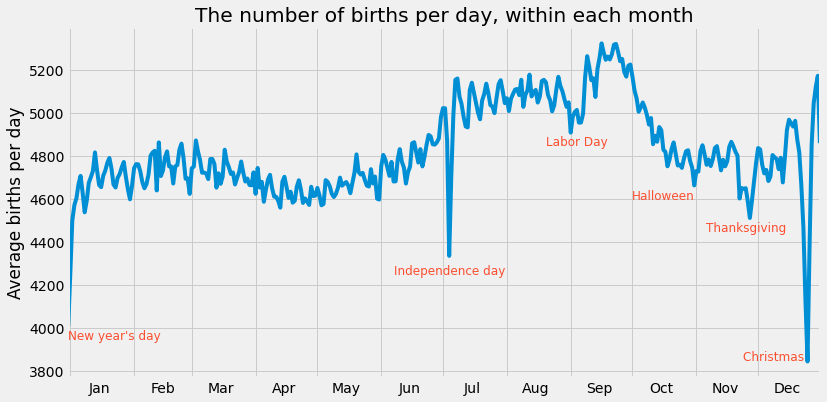

In [30]:
import matplotlib as mpl

fig, ax = plt.subplots(figsize=(12,6))

ax = births_by_day.plot(ax=ax)

plt.legend().remove()

ax.set(ylabel='Average births per day', 
       title='The number of births per day, within each month')


# Adding annotations

style = dict(size=12, color='#fc4f30')

ax.text('2012-1-1', 3950, "New year's day", **style)
ax.text('2012-7-4', 4250, "Independence day", ha='center', **style)
ax.text('2012-9-4', 4850, "Labor Day", ha='center', **style)
ax.text('2012-10-31', 4600, "Halloween", ha='right', **style)
ax.text('2012-11-25', 4450, "Thanksgiving", ha='center', **style)
ax.text('2012-12-25', 3850, "Christmas ", ha='right', **style)

# Centering x-axis labels

ax.xaxis.set_major_locator(mpl.dates.MonthLocator())
ax.xaxis.set_minor_locator(mpl.dates.MonthLocator(bymonthday=15))
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter('%h'));

The graph depicts a marked reduction in births on national holidays in the United States.